In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [67]:
df = pd.read_csv("Dataset(Processed).csv") 

In [11]:
print(df.shape) 


(50, 19)


In [13]:
df.head()

,Age Group,Gender,Usage Frequency,Daily Usage,Purpose,Image Pressure,Anxiety/Insecurity,Self-Esteem Impact,Life Comparison,FOMO,Spending Influence,Body Image,Influencer Engagement,Tried Trends,Sleep Impact,Mental Drain,Happiness/Stress,Took a Break,Reduce Usage?
0,18-24,Male,Once a day,30 minutes - 1 hour,Keeping up with friends,Rarely,Sometimes,No effect,Rarely,Rarely,Rarely,No,Never,No,Sometimes it affects my sleep,Sometimes,Depends on the content I engage with,Occasionally,Yes
1,18-24,Female,Multiple times a day,More than 2 hours,Entertainment,Rarely,No,Depends on the content I see,Occasionally,Sometimes,Yes,No,A few times a week,No,Sometimes it affects my sleep,Yes,No affect,Yes,Yes
2,18-24,Male,Multiple times a day,More than 2 hours,Entertainment,Rarely,Yes,Depends on the content I see,Yes,No,Occasionally,"Yes, positively",Never,Yes,I stay up late because of Instagram,Yes,More stressed,Never,Maybe
3,Above 30,Female,Multiple times a day,<30 minutes,Keeping up with friends,Yes,Sometimes,No effect,Rarely,No,No,"Yes, positively",Daily,No,Sometimes it affects my sleep,No,Happier,Never,Maybe
4,Above 30,Male,Never,<30 minutes,Keeping up with friends,No,No,No effect,No,No,No,No,Never,No,No impact,No,No affect,Never,Strongly


In [15]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age Group              50 non-null     object
 1   Gender                 50 non-null     object
 2   Usage Frequency        50 non-null     object
 3   Daily Usage            50 non-null     object
 4   Purpose                50 non-null     object
 5   Image Pressure         50 non-null     object
 6   Anxiety/Insecurity     50 non-null     object
 7   Self-Esteem Impact     50 non-null     object
 8   Life Comparison        50 non-null     object
 9   FOMO                   50 non-null     object
 10  Spending Influence     50 non-null     object
 11  Body Image             50 non-null     object
 12  Influencer Engagement  50 non-null     object
 13  Tried Trends           50 non-null     object
 14   Sleep Impact          50 non-null     object
 15  Mental Drain           50

In [17]:
print(df.describe())

       Age Group Gender       Usage Frequency          Daily Usage  \
count         50     50                    50                   50   
unique         5      2                     5                    4   
top        18-24   Male  Multiple times a day  30 minutes - 1 hour   
freq          19     30                    20                   21   

                        Purpose Image Pressure Anxiety/Insecurity  \
count                        50             50                 50   
unique                        5              5                  5   
top     Keeping up with friends             No          Sometimes   
freq                         25             20                 15   

       Self-Esteem Impact Life Comparison FOMO Spending Influence Body Image  \
count                  50              50   50                 50         50   
unique                  5               5    5                  5          3   
top             No effect              No   No             Rare

In [19]:
print(df.nunique())

Age Group                5
Gender                   2
Usage Frequency          5
Daily Usage              4
Purpose                  5
Image Pressure           5
Anxiety/Insecurity       5
Self-Esteem Impact       5
Life Comparison          5
FOMO                     5
Spending Influence       5
Body Image               3
Influencer Engagement    4
Tried Trends             4
 Sleep Impact            4
Mental Drain             5
Happiness/Stress         6
Took a Break             4
Reduce Usage?            5
dtype: int64


In [21]:
print(df.isnull().sum())

Age Group                0
Gender                   0
Usage Frequency          0
Daily Usage              0
Purpose                  0
Image Pressure           0
Anxiety/Insecurity       0
Self-Esteem Impact       0
Life Comparison          0
FOMO                     0
Spending Influence       0
Body Image               0
Influencer Engagement    0
Tried Trends             0
 Sleep Impact            0
Mental Drain             0
Happiness/Stress         0
Took a Break             0
Reduce Usage?            0
dtype: int64


In [23]:
df.dropna(axis=1, thresh=0.7 * len(df), inplace=True)

In [25]:
df.dropna(axis=0, inplace=True)

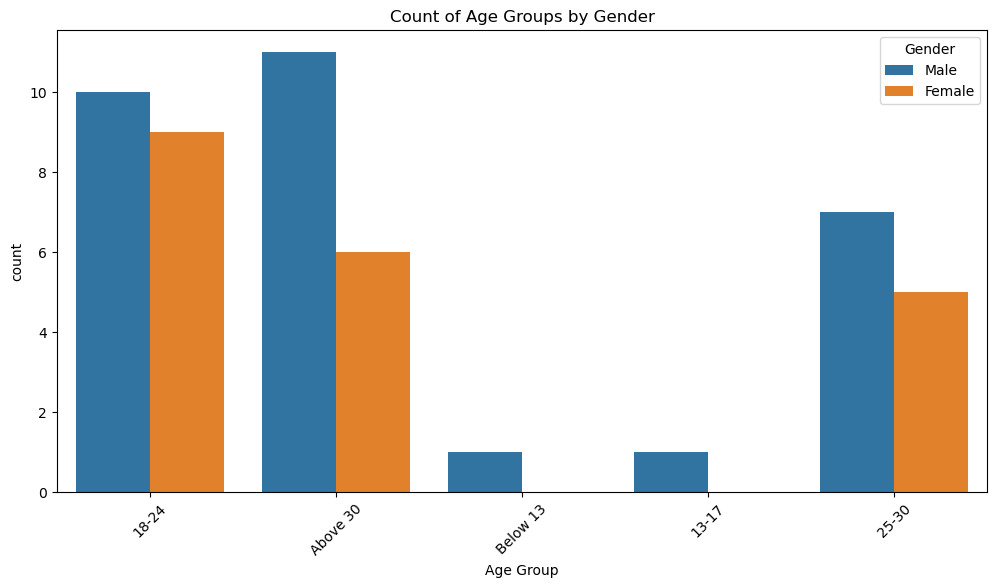

In [69]:
# Plot count plots for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Age Group", hue="Gender")
plt.title("Count of Age Groups by Gender")
plt.xticks(rotation=45)
plt.show()

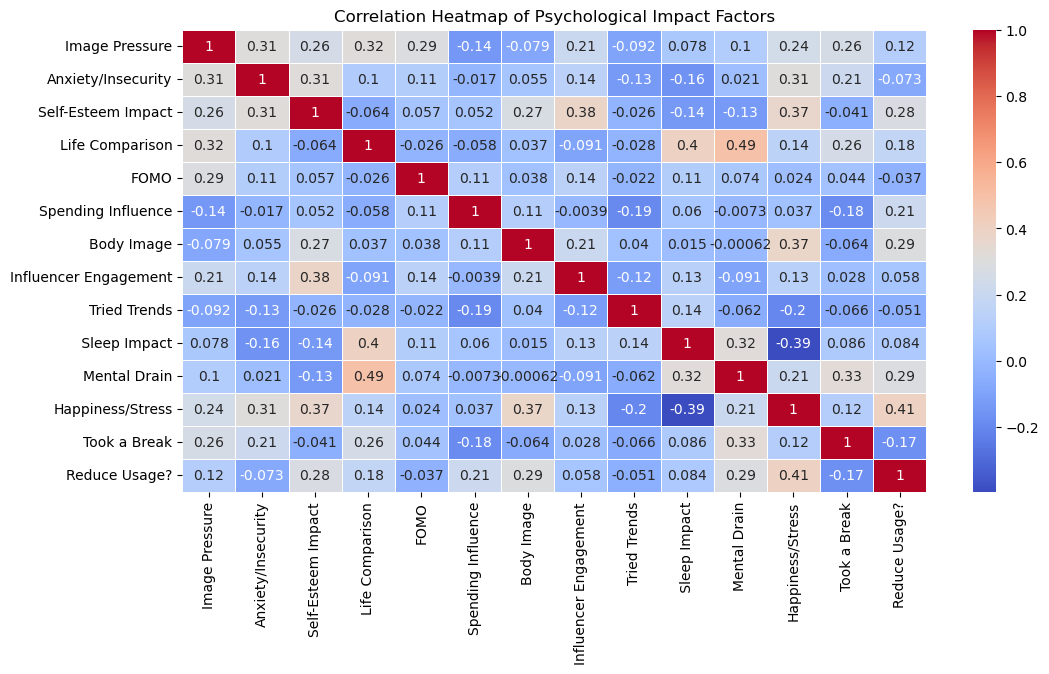

In [73]:
# Convert categorical responses into numerical values for correlation
df_encoded = df.copy()
category_columns = ["Image Pressure", "Anxiety/Insecurity", "Self-Esteem Impact", "Life Comparison", "FOMO",
                    "Spending Influence", "Body Image", "Influencer Engagement", "Tried Trends", " Sleep Impact",
                    "Mental Drain", "Happiness/Stress", "Took a Break", "Reduce Usage?"]

# Encoding categorical responses
df_encoded[category_columns] = df_encoded[category_columns].apply(lambda x: pd.factorize(x)[0])

# Compute correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded[category_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Psychological Impact Factors")
plt.show()

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load dataset
file_path = "Dataset(Processed).csv"
df = pd.read_csv(file_path)

# Define columns for encoding
one_hot_cols = ["Age Group", "Gender", "Usage Frequency", "Daily Usage", "Purpose", "Happiness/Stress", "Reduce Usage?"]

label_encoding_cols = [
    "Image Pressure", "Anxiety/Insecurity", "Self-Esteem Impact", "Life Comparison",
    "FOMO", "Spending Influence", "Body Image", "Influencer Engagement",
    "Tried Trends", " Sleep Impact", "Mental Drain", "Took a Break"
]

# One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Label Encoding
label_encoders = {}
for col in label_encoding_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Save the processed dataset
processed_file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved to: {processed_file_path}")


Processed dataset saved to: /Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv


In [45]:
df = pd.read_csv("Social_Media_Data_Analysis2.csv") 

In [47]:
df.head()

,Image Pressure,Anxiety/Insecurity,Self-Esteem Impact,Life Comparison,FOMO,Spending Influence,Body Image,Influencer Engagement,Tried Trends,Sleep Impact,...,Purpose_News and current events,Happiness/Stress_Depends on the content I see,Happiness/Stress_Happier,Happiness/Stress_More stressed,Happiness/Stress_No affect,Happiness/Stress_No effect,Reduce Usage?_Never,Reduce Usage?_No,Reduce Usage?_Strongly,Reduce Usage?_Yes
0,2,3,4,2,2,2,0,2,0,3,...,False,False,False,False,False,False,False,False,False,True
1,2,0,0,1,3,4,0,0,0,3,...,False,False,False,False,True,False,False,False,False,True
2,2,4,0,4,0,1,2,2,3,1,...,False,False,False,True,False,False,False,False,False,False
3,4,3,4,2,0,0,2,1,0,3,...,False,False,True,False,False,False,False,False,False,False
4,0,0,4,0,0,0,0,2,0,2,...,False,False,False,False,True,False,False,False,True,False


In [7]:
numeric_df = df.select_dtypes(include=['number'])

# Detect outliers using IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [59]:
print(df.shape)

(50, 37)


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Image Pressure                                 50 non-null     int64
 1   Anxiety/Insecurity                             50 non-null     int64
 2   Self-Esteem Impact                             50 non-null     int64
 3   Life Comparison                                50 non-null     int64
 4   FOMO                                           50 non-null     int64
 5   Spending Influence                             50 non-null     int64
 6   Body Image                                     50 non-null     int64
 7   Influencer Engagement                          50 non-null     int64
 8   Tried Trends                                   50 non-null     int64
 9    Sleep Impact                                  50 non-null     int64
 10  Ment

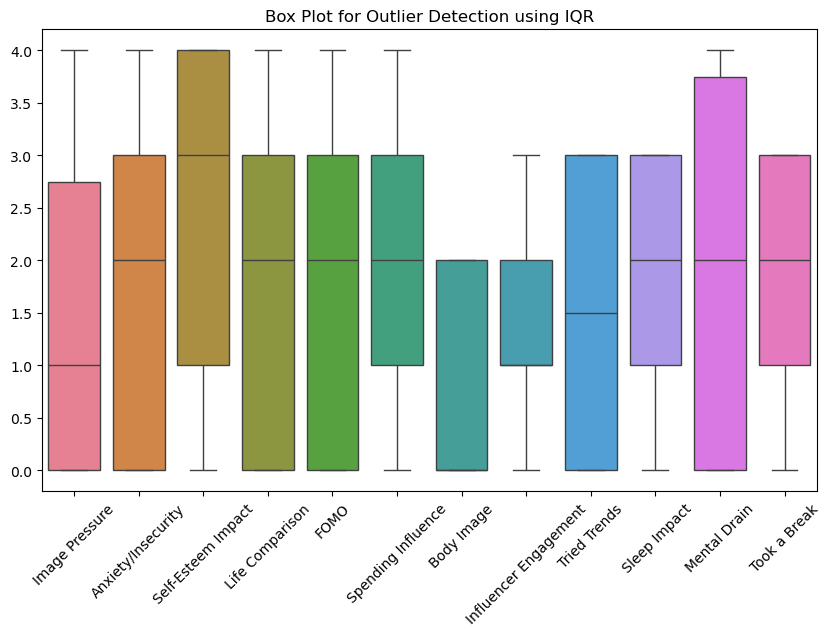

In [9]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection using IQR")
plt.savefig("/Users/abhishekbohra/Documents/BoxPlot.jpg")
plt.show()

TESTING:

In [76]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset (replace 'file_path.csv' with the actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Define the two groups based on Influencer Engagement
engaged = df[df["Influencer Engagement"] > 0]["Body Image"]
not_engaged = df[df["Influencer Engagement"] == 0]["Body Image"]

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(engaged, not_engaged, equal_var=False)  # Welch’s t-test

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in Body Image scores between those who engage with influencers and those who don’t.")
else:
    print("There is no significant difference in Body Image scores between the two groups.")


T-statistic: -0.5401
P-value: 0.5959
There is no significant difference in Body Image scores between the two groups.


In [84]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset (replace 'file_path.csv' with the actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df["Took a Break"], df["Mental Drain"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Expected Frequencies Table:\n", expected)
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)



# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between taking a break from social media and mental drain.")
else:
    print("There is no significant association between taking a break from social media and mental drain.")


Expected Frequencies Table:
 [[1.68 0.48 1.2  1.08 1.56]
 [3.08 0.88 2.2  1.98 2.86]
 [2.52 0.72 1.8  1.62 2.34]
 [6.72 1.92 4.8  4.32 6.24]]
Chi-Square Statistic: 14.899244274244271
Degrees of Freedom: 12
P-value: 0.24699282302024717
There is no significant association between taking a break from social media and mental drain.


In [90]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset (replace 'file_path.csv' with actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df["FOMO"], df["Life Comparison"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Expected Frequencies Table:\n", expected)
print("Degrees of Freedom:", dof)
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)


# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between FOMO and Life Comparison.")
else:
    print("There is no significant association between FOMO and Life Comparison.")


Expected Frequencies Table:
 [[5.1  0.6  4.2  1.5  3.6 ]
 [2.38 0.28 1.96 0.7  1.68]
 [3.06 0.36 2.52 0.9  2.16]
 [3.4  0.4  2.8  1.   2.4 ]
 [3.06 0.36 2.52 0.9  2.16]]
Degrees of Freedom: 16
Chi-Square Statistic: 13.09222577920057
P-value: 0.6660029222924144
There is no significant association between FOMO and Life Comparison.


In [92]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset (replace 'file_path.csv' with actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df["Tried Trends"], df["Body Image"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between trying social media trends and body image perception.")
else:
    print("There is no significant association between trying social media trends and body image perception.")


Degrees of Freedom: 6
Expected Frequencies Table:
 [[13.44  0.48 10.08]
 [ 0.56  0.02  0.42]
 [ 2.8   0.1   2.1 ]
 [11.2   0.4   8.4 ]]
Chi-Square Statistic: 15.133928571428571
P-value: 0.01924024178013423
There is a significant association between trying social media trends and body image perception.


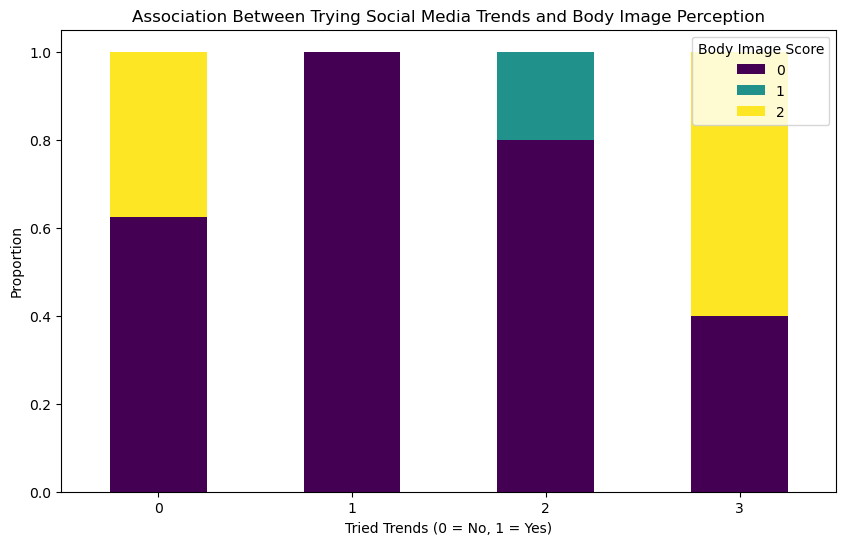

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'file_path.csv' with actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df["Tried Trends"], df["Body Image"], normalize='index')  # Normalize to get proportions

# Plot stacked bar chart
contingency_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

# Customizing the plot
plt.title("Association Between Trying Social Media Trends and Body Image Perception")
plt.xlabel("Tried Trends (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(title="Body Image Score")
plt.xticks(rotation=0)
plt.savefig("/Users/abhishekbohra/Documents/TrendsVperception.jpg")
plt.show()


STATISTICAL ANALYSIS:

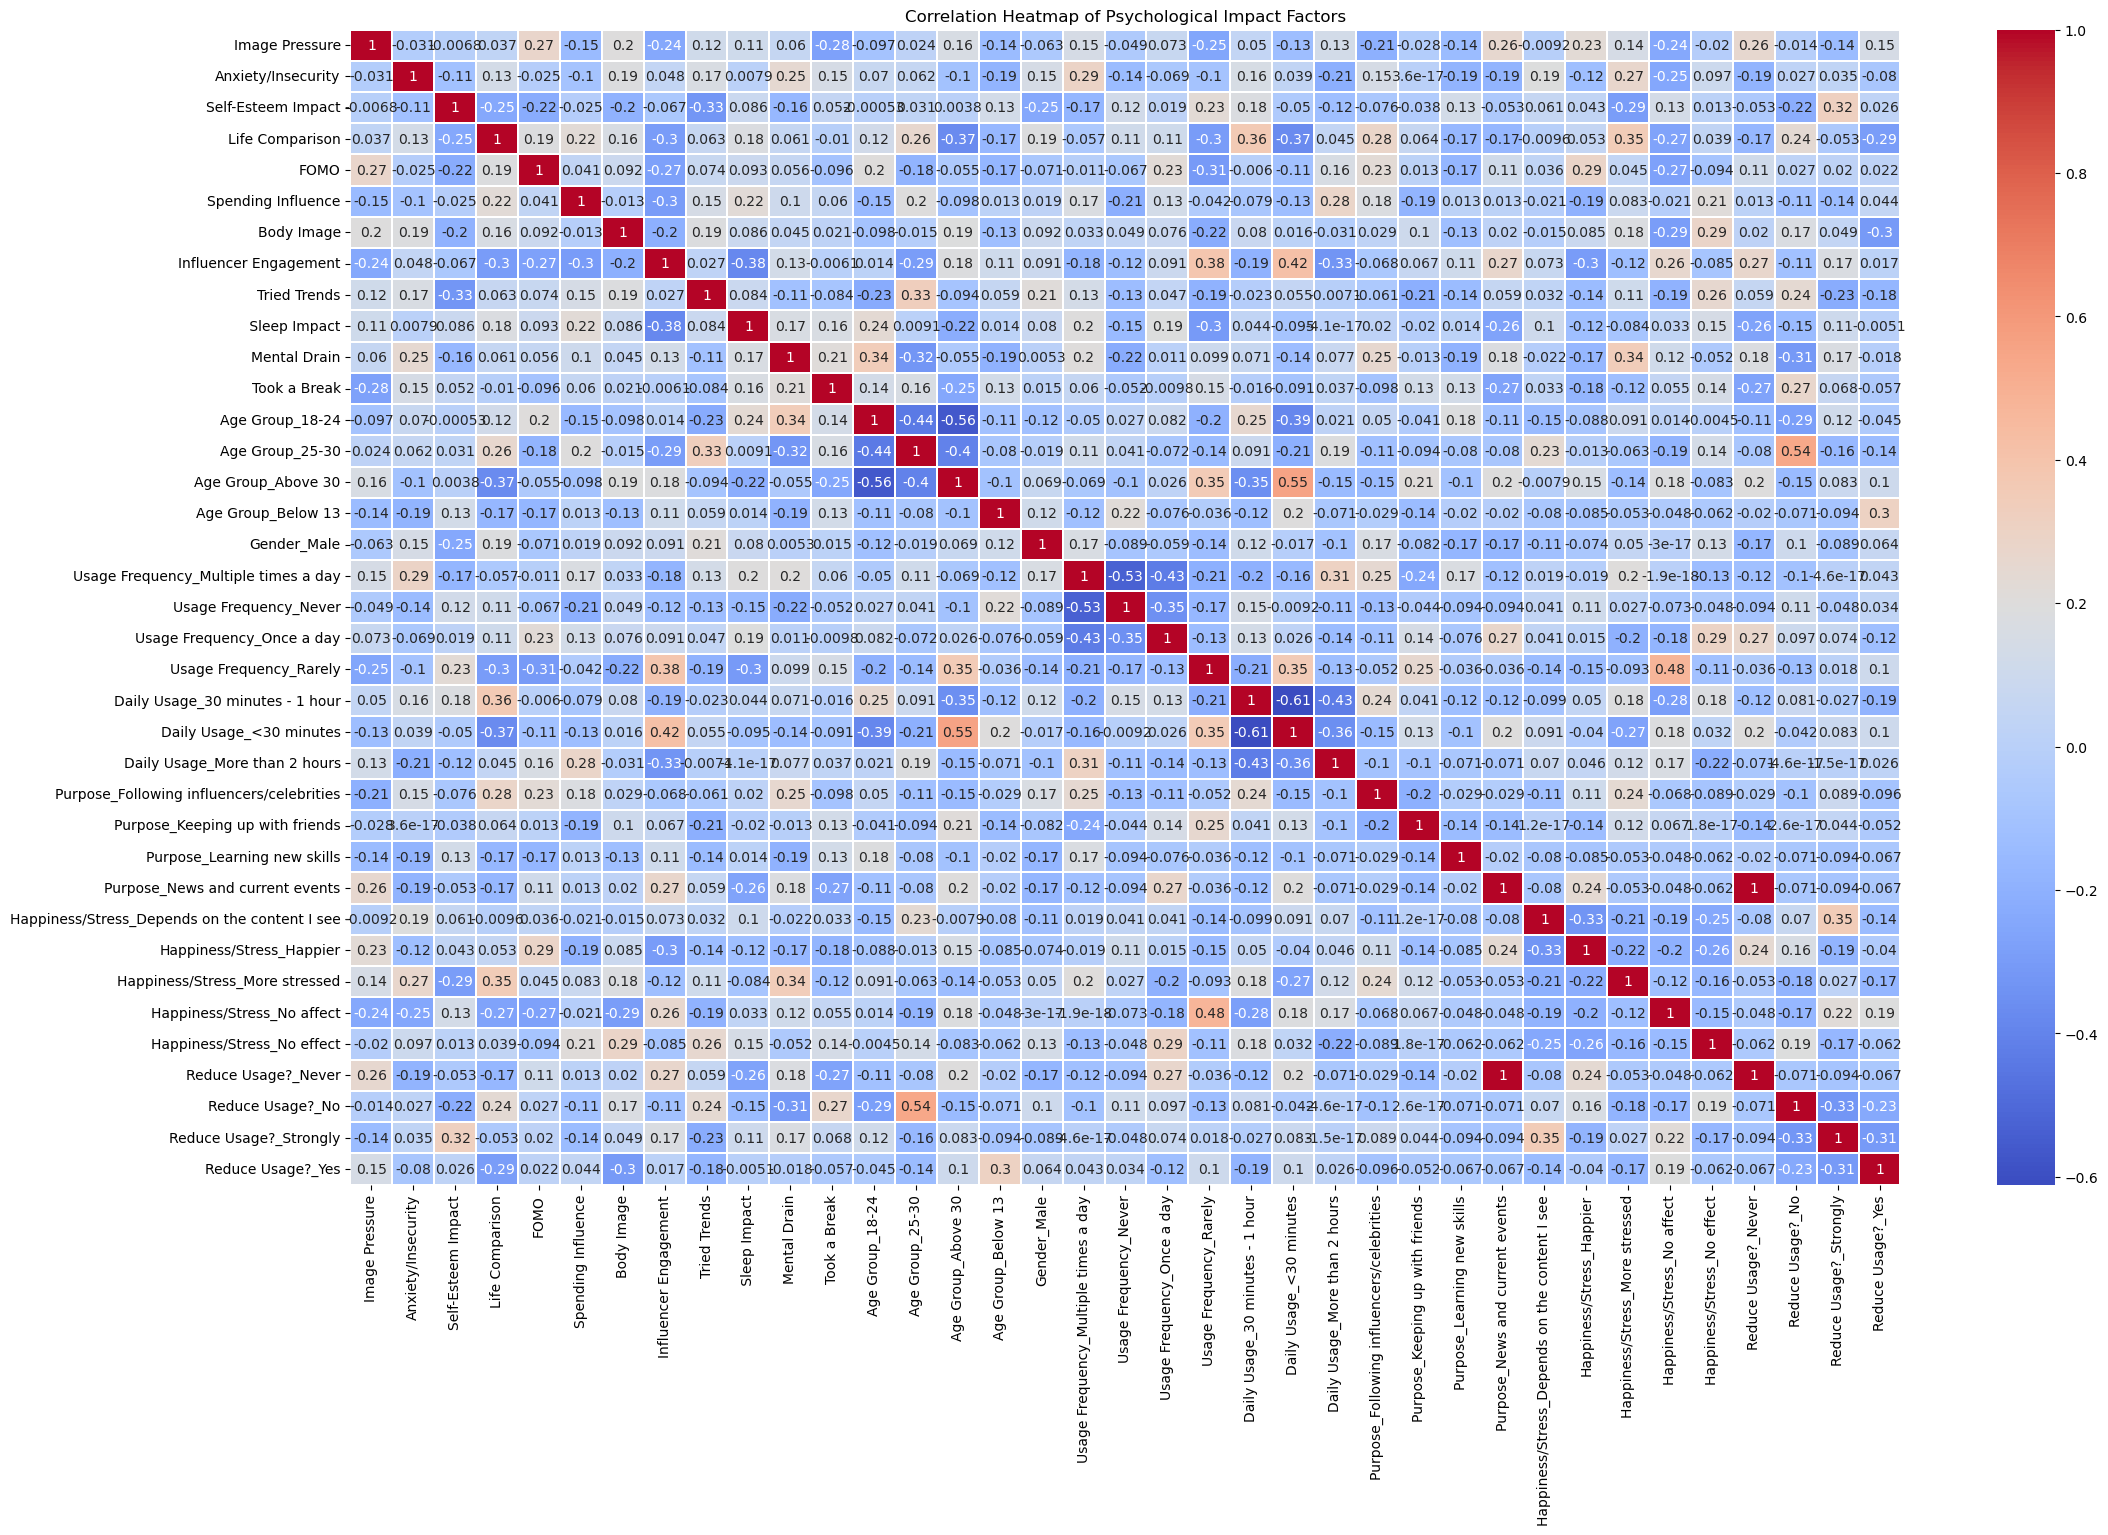

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace 'file_path.csv' with actual path)
file_path = "/Users/abhishekbohra/Documents/Social_Media_Data_Analysis2.csv"
df = pd.read_csv(file_path)

# Compute correlation matrix (only numerical columns)
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=1.2)

# Customize
plt.title("Correlation Heatmap of Psychological Impact Factors")
plt.savefig("/Users/abhishekbohra/Documents/HeatMap.jpg")
plt.show()
